In [1]:
#!/usr/bin/env python3

'''
Code to experiment with RPCholesky
'''

import numpy as np
import dpp_lra, rp_cholesky, unif_sample, leverage_score
from utils import approximation_error
from matrix import PSDMatrix, KernelMatrix
import gallery
import scipy
import meshio
import matplotlib.pyplot as plt


In [2]:
def structured_grid_2d(nx, **kwargs):
    '''
    A structured grid on unit square domain, i.e., [0,1]*[0,1]
    with nx points in each dimension 
    '''
    x = np.linspace(0,1,nx)
    xv, yv = np.meshgrid(x, x)

    X = np.vstack([xv.flatten(), yv.flatten()]).T

    return KernelMatrix(X, **kwargs)

In [3]:
method = rp_cholesky.rp_cholesky
#method = rp_cholesky.greedy
# method = unif_sample.uniform_sample
nx = 50 # points in each direction
N = nx*nx # Kernel matrix is of size N*N
As = { "Gaussian" : structured_grid_2d(nx, bandwidth = 0.1),
       "Matern0.5": structured_grid_2d(nx, bandwidth = 0.1, kernel='matern', nu=0.5)}

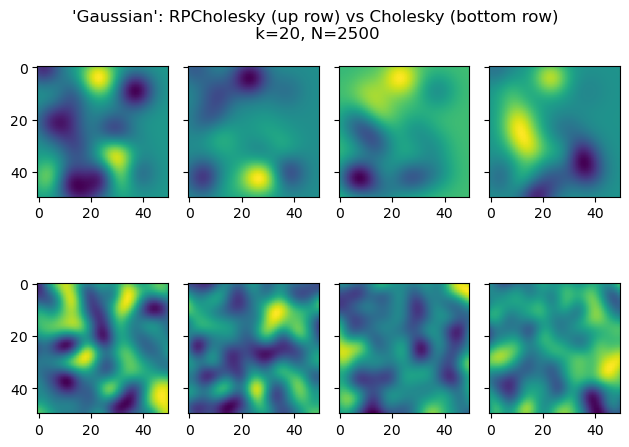

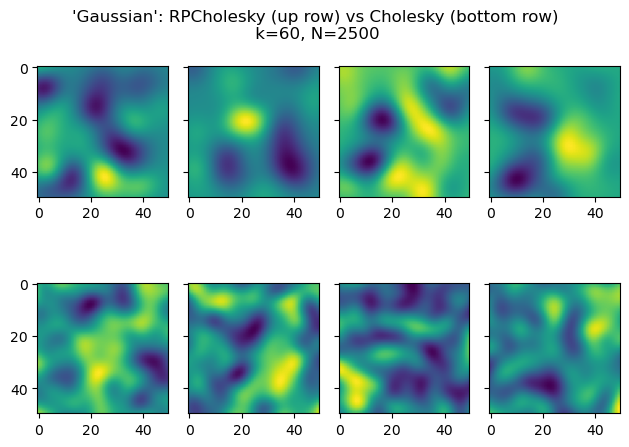

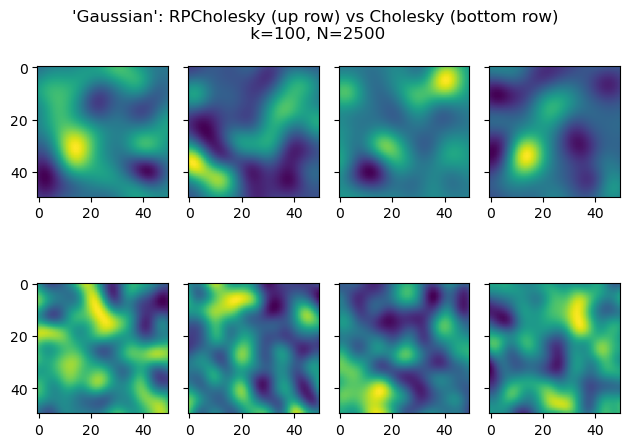

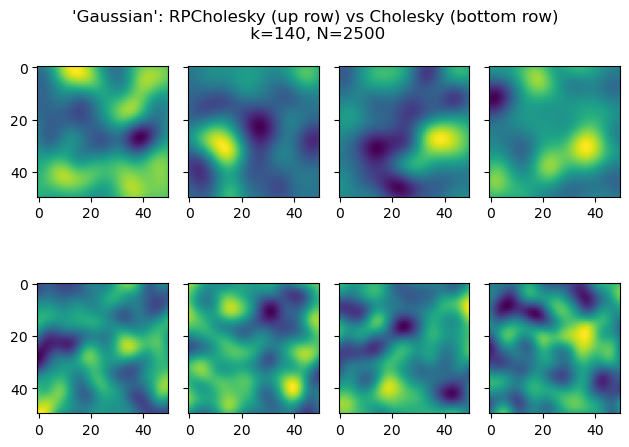

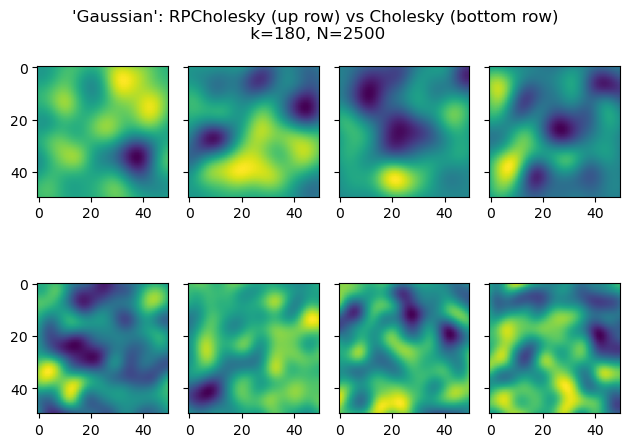

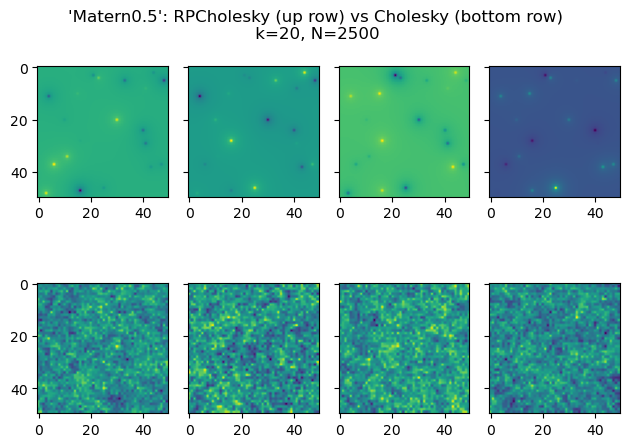

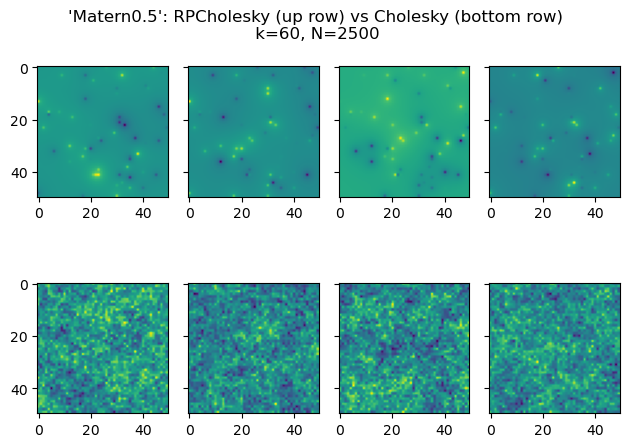

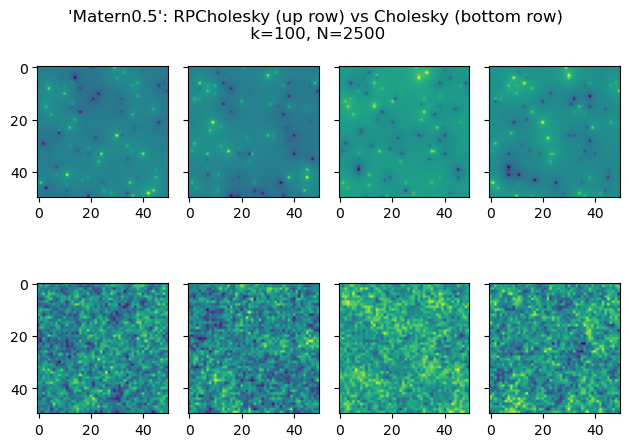

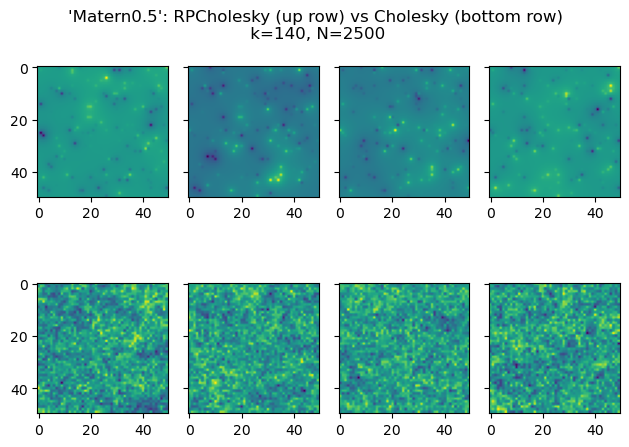

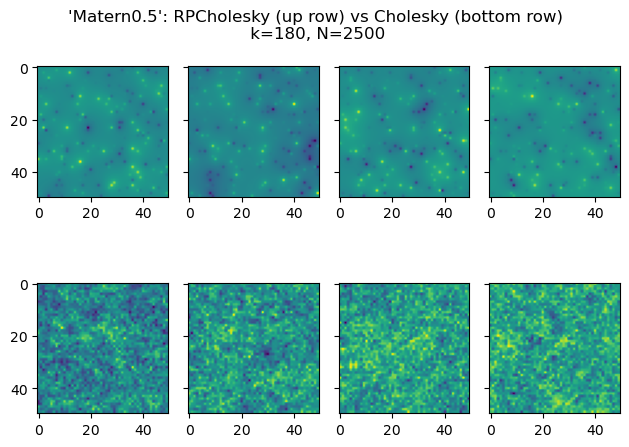

In [4]:
for matrix_name, A in As.items():
    full_matrix = A[:,:]
    L = np.linalg.cholesky(full_matrix+np.eye(N)*1e-10) # Cholesky decompostion of kernel matrix
    for k in np.arange(20,220,40):
        F = method(A, k) # RPChokesky approximation of kernel matrix
        no_of_rf = 4 # we are gonna draw 4 samples in each case
        fig, axs = plt.subplots(2, no_of_rf, sharey=True)
        for i in range(no_of_rf):
            u_lra = np.random.randn(k, 1)
            rf_lra = F.F@u_lra # sample with RPCholeksy approximation of A

            u_full = np.random.randn(nx*nx, 1)
            rf_full = L@u_full # sample with Choleksy of A
            axs[0, i].imshow(rf_lra.reshape(nx,nx))
            axs[1, i].imshow(rf_full.reshape(nx,nx))
        fig.tight_layout()
        fig.suptitle('%r: RPCholesky (up row) vs Cholesky (bottom row)\n k=%d, N=%d'%(matrix_name, k, N))

/home/cz/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Eigenvalues of kernel matrix')

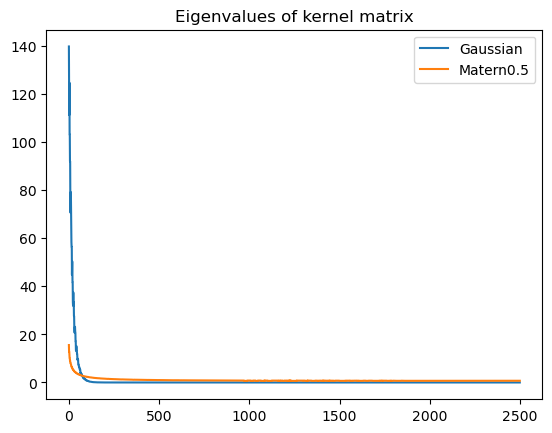

In [5]:
for matrix_name, A in As.items():
    full_matrix = A[:,:]
    plt.plot(np.linalg.eigvals(full_matrix), label=matrix_name)
plt.legend()
plt.title("Eigenvalues of kernel matrix")    